In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv
/kaggle/input/human-stress-detection-in-and-through-sleep/IEEE-TCE_2020-08-0175_SaYoPillow.pdf
/kaggle/input/human-stress-detection-in-and-through-sleep/readme.docx


# Read Data in and do head

In [2]:
dataset = pd.read_csv("../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")

dataset.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Change names of columns

In [3]:
dataset = dataset.rename(columns={"sr" : "Snoring Rate", "rr" : "Respiration Rate", "t": "Body Temp", "lm" : "Limb Movement",
                       "bo" : "Blood Oxygen", "rem" : "Eye Movement", "sr.1" : "Sleeping Hours", "hr" : "Heart Rate", "sl" : "Stress Level"})

dataset.head()

,Snoring Rate,Respiration Rate,Body Temp,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Show distribution of the categories

Text(0, 0.5, 'Counts')

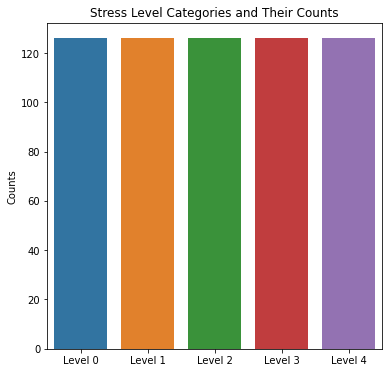

In [4]:
stress_0 = dataset[dataset["Stress Level"] == 0]
stress_1 = dataset[dataset["Stress Level"] == 1]
stress_2 = dataset[dataset["Stress Level"] == 2]
stress_3 = dataset[dataset["Stress Level"] == 3]
stress_4 = dataset[dataset["Stress Level"] == 4]

stress_level_categories = ["Level 0", "Level 1", "Level 2", "Level 3", "Level 4"]

stress_level_distribution = [len(stress_0), len(stress_1), len(stress_2), len(stress_3), len(stress_4)]

plt.figure(figsize=[6, 6])
sns.barplot(x=stress_level_categories, y=stress_level_distribution)

plt.title("Stress Level Categories and Their Counts")
plt.ylabel("Counts")

# Exploratory Data Analysis (plot average sleep for each category with seaborn barplot)

In [5]:
x = np.mean(stress_4["Sleeping Hours"])

# Correlation heatmap sns.heatmap(df.corr())

<AxesSubplot:>

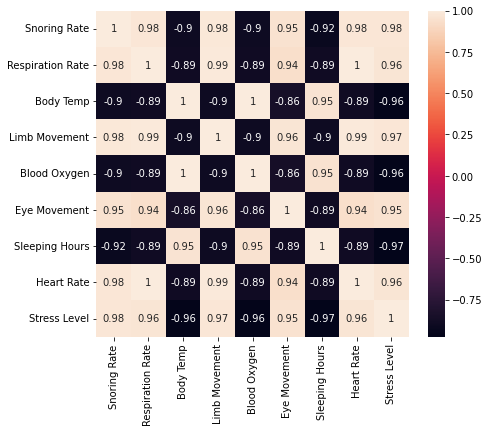

In [6]:
plt.figure(figsize=[7, 6])
sns.heatmap(dataset.corr(), annot=True)

# Snoring rate, limb movement, and sleeping hours have the highest correlations, including both positive and negative.

<AxesSubplot:xlabel='Limb Movement', ylabel='Density'>

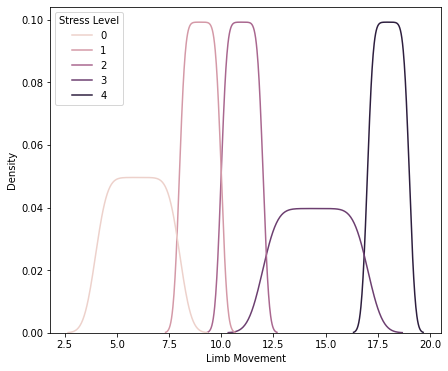

In [7]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=dataset, x="Limb Movement", hue="Stress Level")

# KDEPLOT shows high limb movement equals high stress.

Text(0, 0.5, 'Body Temperature (F)')

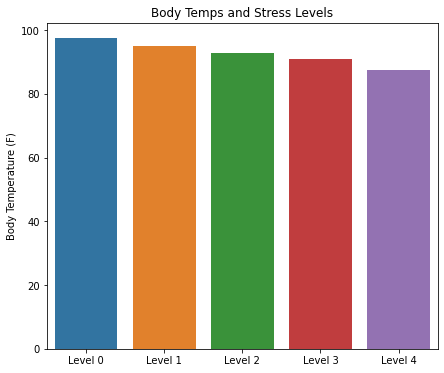

In [8]:
body_temps = [stress_0["Body Temp"].mean(), stress_1["Body Temp"].mean(), stress_2["Body Temp"].mean(), stress_3["Body Temp"].mean(), stress_4["Body Temp"].mean()]


plt.figure(figsize=[7, 6])
plt.title("Body Temps and Stress Levels")
sns.barplot(x=stress_level_categories, y=body_temps)
plt.ylabel("Body Temperature (F)")

# As stress increases, body temperature descreases.

# Narrow down what features we want through correlation and other exploratory data analysis, comparing features across stress level categories.

# train test split to get X_train, X_test, y_train, y_test. Check distribution after split.

# train test each model (if we have time try MLP)

# cross validation of models

# evaluation metrics and run time evaluation

# baseline of mode and random off of entire datset

# create a small dataframe with model name that shows accuracy, precision, recall, runtime

# learning curve for each model? If curve needs data, maybe add synthetic data?

# Hyperparameter Tuning

# Figure out best model and do confusion matrix

# Feature importance to see what sleep features matter